# Lab 06 Data visualization with matplotlib and seaborn

Nice visualization libraries:
- matplotlib: https://matplotlib.org/stable/index.html
- seaborn: http://seaborn.pydata.org/
- bokeh: http://bokeh.pydata.org/en/latest/
- folium (geospatial visualization): https://python-visualization.github.io/folium/
- kepler.gl (large-scale geospatial visualization): https://kepler.gl/

## Please submit your finished lab06 jupyter notebook via pull request in GitHub

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

## load the data sets

In [8]:
# load the gps coordinate data, using the date as the full set's index
# the data files are encoded as utf-8: specify so to prevent matplotlib from choking on diacritics
df = pd.read_csv(r'C:/Users/Xingyi/Desktop/PTUA/PTUA2024/Lab06/summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv(r'C:/Users/Xingyi/Desktop/PTUA/PTUA2024/Lab06/summer-travel-gps-dbscan.csv', encoding='utf-8')

In [9]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [10]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


## First up: Bar Charts

                   country  Visit_Count
0                    Spain          646
1                 Portugal          256
2                  Germany          225
3           Czech Republic          130
4                   Poland          104
5                   Turkey           94
6                   Greece           82
7               Montenegro           51
8        Macedonia (FYROM)           34
9                  Croatia           30
10                  Kosovo           30
11                 Albania           29
12  Bosnia and Herzegovina           26
13                  Serbia           15
14          United Kingdom            7


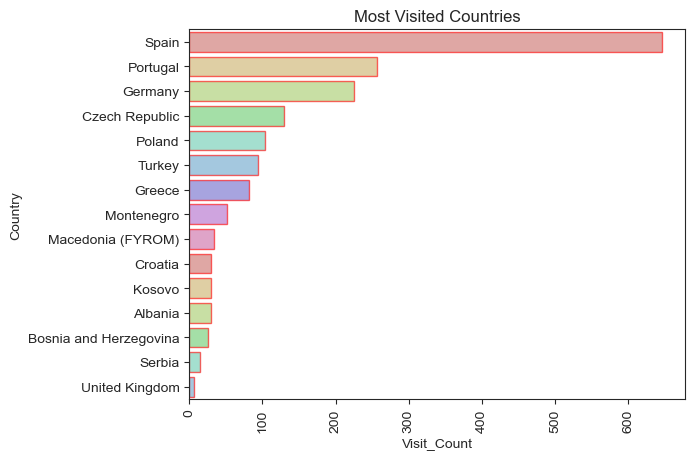

In [44]:
# Q1: Can you draw a bar chart for the most visited countries by using matplotlib and seaborn? You can use the df dataframe.
# Please style the chart to make it look nicer
# such as figsize, width, alpha, color, edgecolor, grid, xlim, and ylim
import seaborn as sns

country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'Visit_Count']

print(country_counts)

# Plot using matplotlib and seaborn
sns.set_style("ticks")
ax = sns.barplot(x="Visit_Count", y="country", data=country_counts, palette=sns.color_palette("hls", 9), alpha=.6, edgecolor='r')
ax.set_title("Most Visited Countries")
ax.set_ylabel('Country')

# Here is the method to rotate the tick labels
for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()

Now you try: re-create the plot above, but make the bars orange with maroon edges.

                                 city  Visit_Count
0                           Barcelona          632
1                              Lisbon          158
2                            Tübingen          131
3                              Prague           97
4                            Istanbul           94
..                                ...          ...
108                           Ostrava            1
109                      Novy Bohumin            1
110                             Bytom            1
111                       Ruda Slaska            1
112  Nové Dvory (Kutná Hora District)            1

[113 rows x 2 columns]


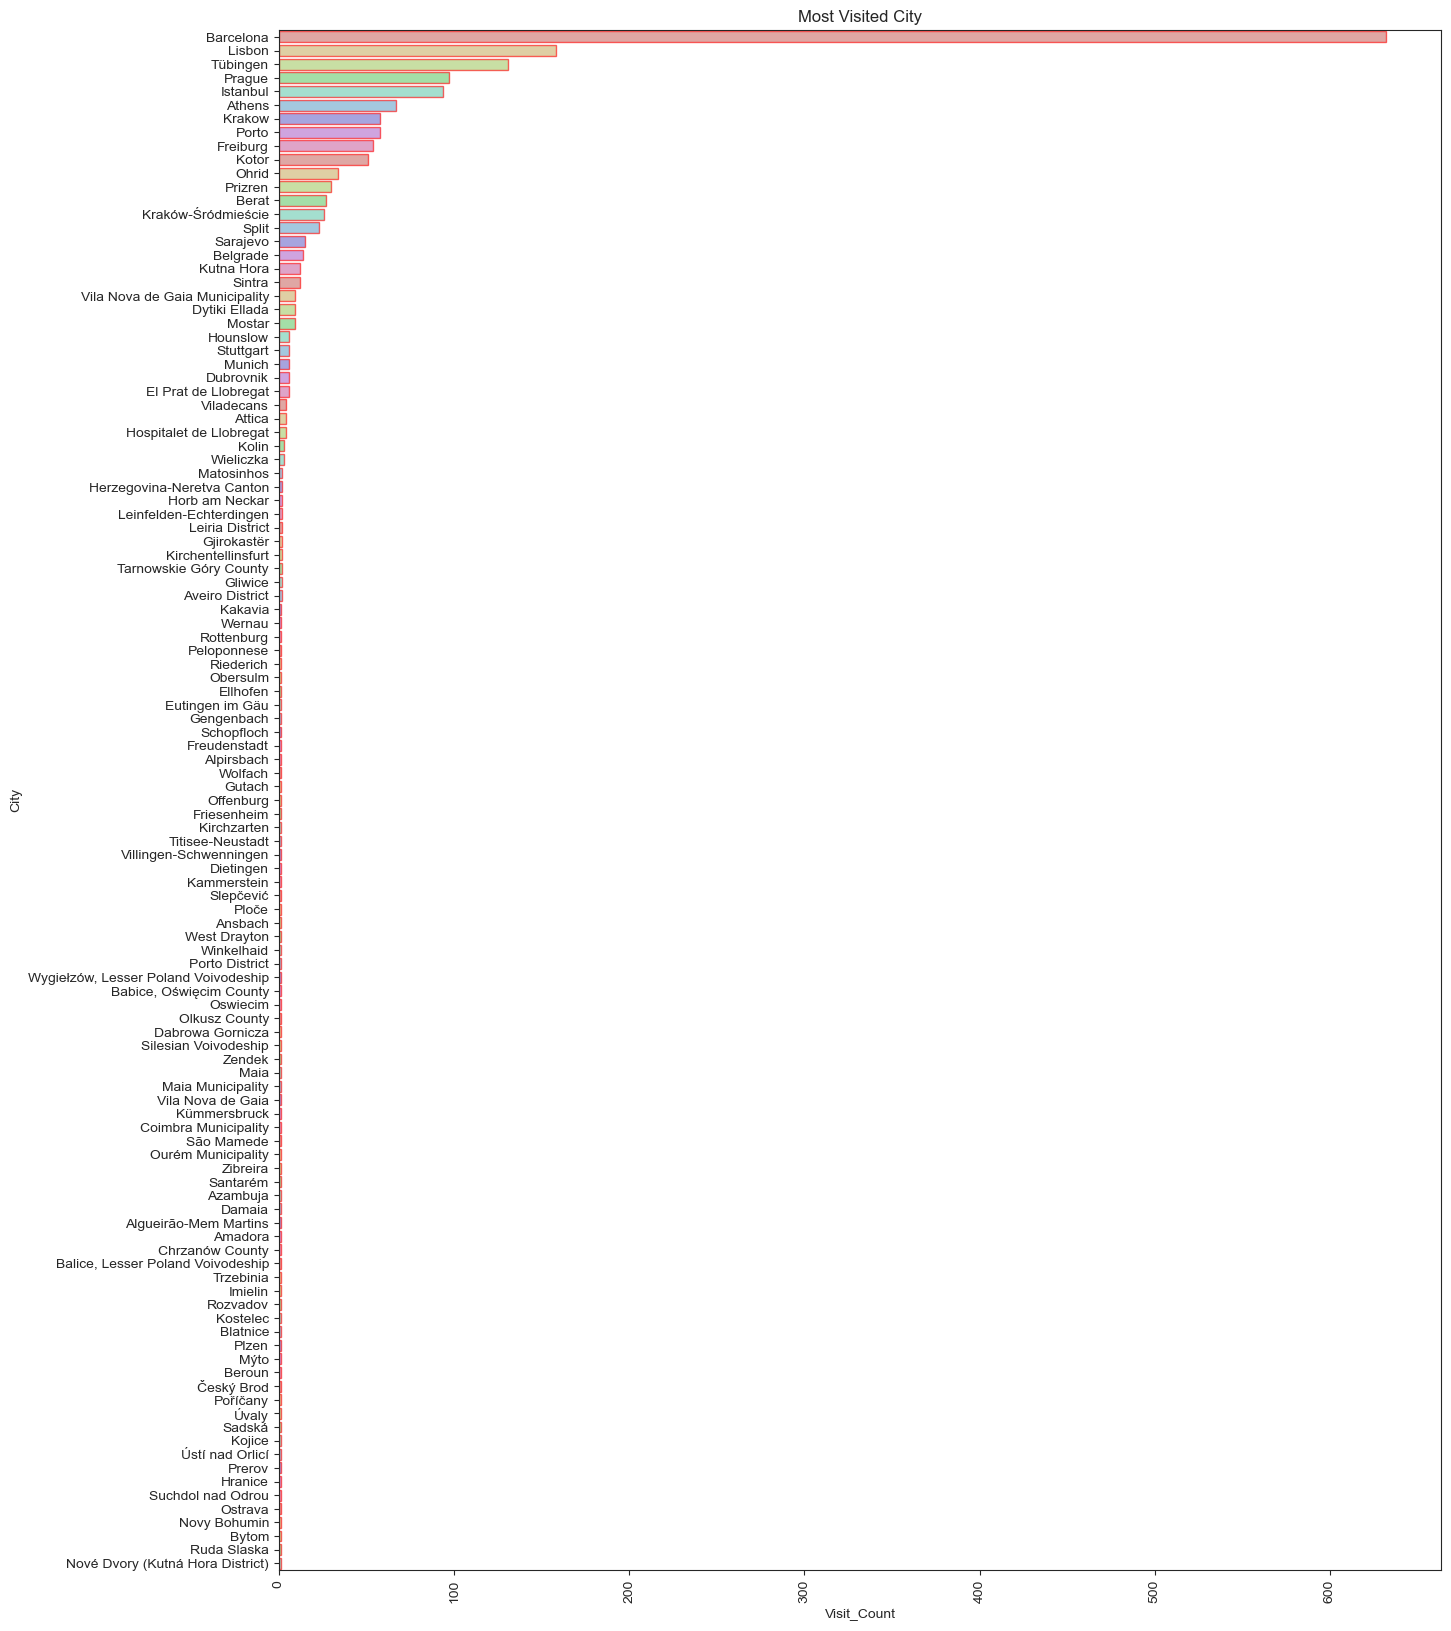

In [57]:
# Q2: Draw the same bar chart, but now for the most visited cities instead of countries
city_counts = df['city'].value_counts().reset_index()
city_counts.columns = ['city', 'Visit_Count']

print(city_counts)

# Plot using matplotlib and seaborn
plt.figure(figsize=(15, 20))
sns.set_style("ticks")
ax = sns.barplot(x="Visit_Count", y="city", data=city_counts, palette=sns.color_palette("hls", 9), alpha=.6, edgecolor='r')
ax.set_title("Most Visited City")
ax.set_ylabel('City')

# Here is the method to rotate the tick labels
for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()

## Next: scatter plots as simple maps

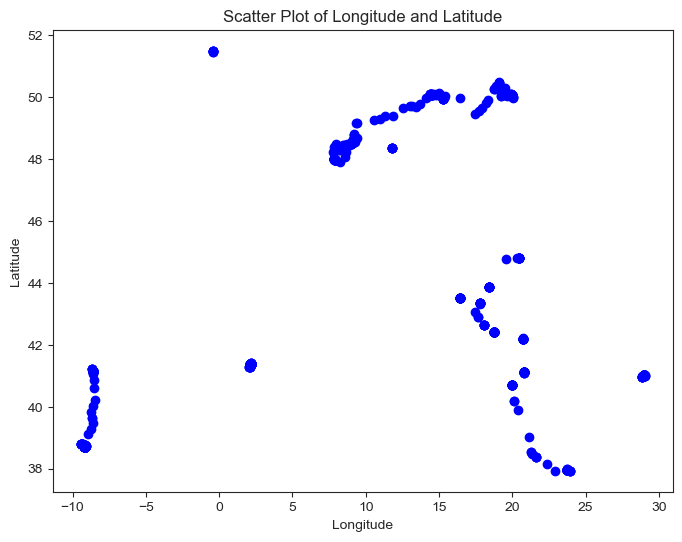

In [61]:
# Q3: Draw a scatter plot the longitude and latitude data, with matplotlib and seaborn defaults. 
# You can use the rs dataframe.
# Please style the chart to make it look nicer with good size and alpha settings.
plt.figure(1, figsize=(8,6))
plt.scatter(df['lon'], df['lat'], color='blue')
plt.title('Scatter Plot of Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Line charts, with annotation

In [62]:
# get the count of records by date
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

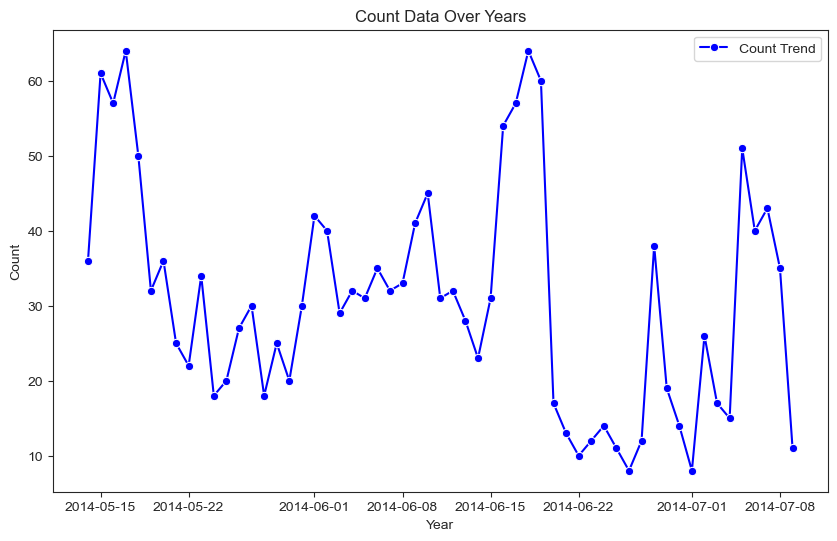

In [69]:
# Q4: Draw a  matplotlib and seaborn line chart from countdata. 
# Please style the chart to make it look nicer with good size and alpha settings. 
plt.figure(figsize=(10, 6))
sns.lineplot(data=countdata, marker='o', color='blue', label='Count Trend')
plt.title('Count Data Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

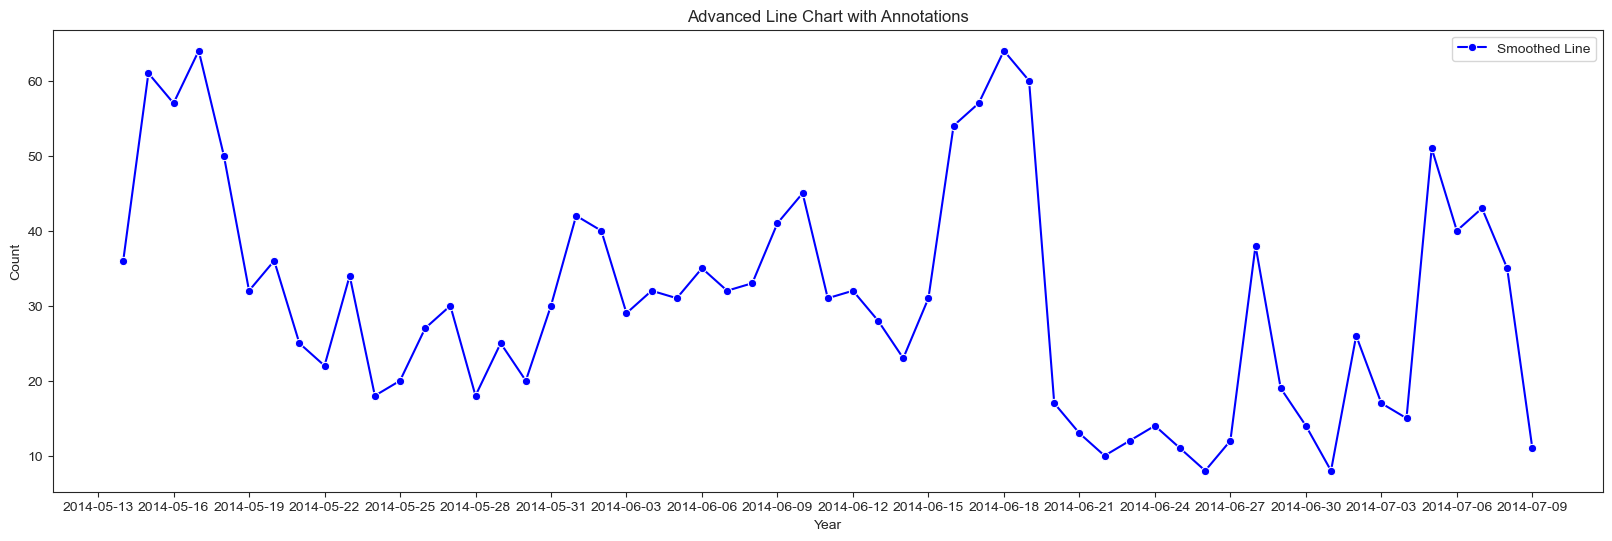

In [77]:
# Q5: Now you try: re-create the plot above with different line widths, colors, and point markers. 
# Play with moving the annotation labels around. Make the vertical tick marks 3 days apart instead of 5.
# experiment with a more advanced challenge like smoothing the line:
# - https://stackoverflow.com/questions/5283649/plot-smooth-line-with-pyplot
# - https://stackoverflow.com/questions/25825946/generating-smooth-line-graph-using-matplotlib



plt.figure(figsize=(20, 6))


# Plot the original data points with larger markers and a different color
sns.lineplot(data=countdata, marker='o', color='blue', label='Smoothed Line')

# Adjust the vertical tick marks to be 3 days apart
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))

plt.title('Advanced Line Chart with Annotations')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

# question: i have no idea how to make smoothline

## Pie charts

In [100]:
cities = df['city'].value_counts()
print(cities.count())
cities.head()

113


city
Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: count, dtype: int64

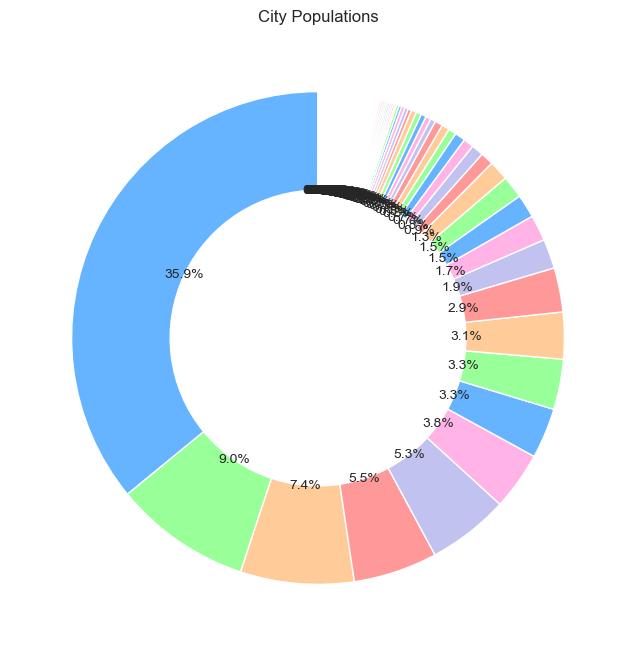

In [104]:
# Q6: draw a pie chart for cities.
# Please style the chart to make it look nicer. 
plt.figure(figsize=(8, 8))
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0', '#ffb3e6']
plt.pie(cities, autopct='%1.1f%%', startangle=90,colors=colors, wedgeprops=dict(width=0.4))
plt.title('City Populations')
plt.show()

# question: What should I do if I want to label the name of the city that corresponds to each scale in the diagram?

## Extra task: Kepler.gl

In [117]:
# Q7: can you visualize the GPS points by using Kepler.gl? 
# Here are some examples: https://docs.kepler.gl/docs/keplergl-jupyter
!pip install keplergl
from keplergl import KeplerGl
df['cities'] = df['cities'].astype(str)
map_1 = KeplerGl(height=600, data={'cities': df})
map_1

# question: I have no idea how to figure out this question.

KeyError: 'cities'